In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!wget http://host.robots.ox.ac.uk:8080/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar

--2022-08-18 13:38:19--  http://host.robots.ox.ac.uk:8080/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:8080... connected.
HTTP request sent, awaiting response... 200 OK
Length: 935534080 (892M) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2009.tar’

VOCtrainval_11-May- 100%[===================>] 892.19M   213MB/s    in 4.3s    

2022-08-18 13:38:23 (209 MB/s) - ‘VOCtrainval_11-May-2009.tar’ saved [935534080/935534080]



In [ ]:
#!mkdir -p mmsegmentation/data/voc2009/images/{training,validation}

In [ ]:
!pip3 install openmim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 4.4 MB/s 
     |████████████████████████████████| 235 kB 30.2 MB/s 
     |████████████████████████████████| 51 kB 8.4 MB/s 


In [ ]:
!mim install mmcv-full

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.6 MB 9.9 MB/s 
     |████████████████████████████████| 190 kB 14.4 MB/s 


In [ ]:
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 10510, done.
remote: Counting objects: 100% (385/385), done.
remote: Compressing objects: 100% (251/251), done.
remote: Total 10510 (delta 166), reused 298 (delta 124), pack-reused 10125
Receiving objects: 100% (10510/10510), 14.17 MiB | 5.83 MiB/s, done.
Resolving deltas: 100% (7615/7615), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 578 kB 12.2 MB/s 
  Running setup.py develop for mmsegmentation


In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.12.1+cu113 True
0.27.0


In [ ]:
!mkdir checkpoints
#bir faydasını farketmedim
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_512x512_160k_ade20k/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth -P checkpoints

--2022-08-18 13:39:02--  https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_512x512_160k_ade20k/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.187.167
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.187.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328404259 (313M) [application/octet-stream]
Saving to: ‘checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth’

segformer_mit-b5_51 100%[===================>] 313.19M  7.24MB/s    in 40s     

2022-08-18 13:39:43 (7.92 MB/s) - ‘checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth’ saved [328404259/328404259]



In [ ]:
!mkdir /content/mmsegmentation/data

In [ ]:
!tar -xf /content/VOCtrainval_11-May-2009.tar -C  /content/mmsegmentation/data

In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
#klasörlerdeki dosya sayıları
!ls /content/mmsegmentation/data/VOCdevkit/VOC2009/JPEGImages | wc -l
!ls /content/mmsegmentation/data/VOCdevkit/VOC2009/SegmentationClass | wc -l

7818
1499


In [ ]:
#

In [ ]:
#JPEGImages klasöründeki fazla resimleri siliyoruz
import os
import os.path as osp
data_root = '/content/mmsegmentation/data/VOCdevkit/VOC2009'
img_dir='JPEGImages'
ann_dir='SegmentationClass'
resimler=os.listdir(osp.join(data_root, img_dir))
segmentler = os.listdir(osp.join(data_root, ann_dir))

for r in resimler:
  if (r[:-3]+'png' not in segmentler):
    os.remove(osp.join(data_root, img_dir,r))




In [ ]:
#klasörlerdeki dosya sayılarının eşitlenmesi gerek
!ls /content/mmsegmentation/data/VOCdevkit/VOC2009/JPEGImages | wc -l
!ls /content/mmsegmentation/data/VOCdevkit/VOC2009/SegmentationClass | wc -l

1499
1499


In [ ]:

classes = ('bg','aeroplane' , 'bicycle' , 'bird' , 'boat' , 'bottle' , 'bus' , 'car' , 'cat' , 'chair'
 , 'cow' , 'diningtable' , 'dog' , 'horse' , 'motorbike' , 'person' , 'pottedplant' , 'sheep' ,
  'sofa' , 'train' , 'tv-monitor', 'other')
palette=[[0,0,0],[128,0,0],[0,128,0],[128,128,0],[0,0,128],[128,0,128],[0,128,128],[128,128,128],[64,0,0],[192,0,0],
         [64,128,0],[192,128,0],[64,0,128],[192,0,128],[64,128,128],[192,128,128],[0,64,0],[128,64,0],[0,192,0],
         [128,192,0],[0,64,128],[224,224,192]]

print(len(classes))
print(len(palette))
#palete arka plan ve beyazımsı diğerlerini de ekliyoruz


22
22


In [ ]:
# split train/val set randomly
import mmcv
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class PascalVoc2009DataSet(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

    

In [29]:
from mmcv import Config

#config_file='/content/mmsegmentation/configs/segformer/test_segformer_mit-b5_512x512_voc2009.py'
config_file='/content/mmsegmentation/configs/segformer/segformer_mit-b5_512x512_160k_ade20k.py'
checkpoint_file = 'checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth'

cfg = Config.fromfile(config_file)


In [30]:
from mmseg.apis import set_random_seed
from mmseg.utils import get_device

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
#cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg

cfg.dataset_type = 'PascalVoc2009DataSet'
cfg.data_root = data_root
cfg.model.decode_head.num_classes = len(classes) #sınıf sayısı (arkaplan dahil)
#cfg.model.auxiliary_head.num_classes = len(classes)


cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8


cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256) #eğitim resimlerinin yarısı olabilir
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'), #img_scale eğitim seti kadar olmalı
    dict(type='Resize', img_scale=(500, 350), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(500, 350),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]



cfg.load_from = checkpoint_file #bir faydasını farkedemedim
cfg.work_dir = './work_dirs/tutorial'
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

cfg.runner.max_iters = 2000 #toplam iterasyon
cfg.log_config.interval = 100 #kaç iterasyonda bir sonuçları göstersin
cfg.evaluation.interval = 2000 #kaç iterasyonda bir genel (IoU...) sonuçları göstersin
cfg.checkpoint_config.interval = 2000 #kaç iterasyonda bir pth dosyasını kaydetsin


In [31]:
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segformer/mit_b5_20220624-658746d9.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=22,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_w

In [32]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor
import mmcv
import os.path as osp


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_segmentor(cfg.model)

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2022-08-18 14:10:34,938 - mmseg - INFO - Loaded 1199 images
2022-08-18 14:10:36,156 - mmseg - INFO - Loaded 300 images
2022-08-18 14:10:36,161 - mmseg - INFO - load checkpoint from local path: checkpoints/segformer_mit-b5_512x512_160k_ade20k_20210726_145235-94cedf59.pth
2022-08-18 14:10:37,839 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([22, 256, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([22]).
2022-08-18 14:10:37,859 - mmseg - INFO - Start running, host: root@e71cd0d14933, work_dir: /content/mmsegmentation/work_dirs/tutorial
2022-08-18 14:10:37,860 - mmseg - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(NORMAL     

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 300/300, 9.0 task/s, elapsed: 33s, ETA:     0s

2022-08-18 14:34:13,926 - mmseg - INFO - per class results:
2022-08-18 14:34:13,929 - mmseg - INFO - 
+-------------+-------+-------+
|    Class    |  IoU  |  Acc  |
+-------------+-------+-------+
|      bg     | 93.76 | 96.07 |
|  aeroplane  | 80.46 | 88.36 |
|   bicycle   | 43.31 | 62.22 |
|     bird    | 74.88 | 93.26 |
|     boat    | 82.84 | 90.67 |
|    bottle   | 75.19 | 88.37 |
|     bus     | 91.27 | 96.36 |
|     car     | 91.06 | 95.15 |
|     cat     | 75.61 | 97.43 |
|    chair    | 49.03 | 62.37 |
|     cow     | 89.58 | 95.18 |
| diningtable | 50.37 | 73.04 |
|     dog     | 62.21 | 69.74 |
|    horse    | 70.07 | 79.41 |
|  motorbike  | 81.08 | 95.16 |
|    person   | 80.17 | 87.75 |
| pottedplant | 47.98 | 79.71 |
|    sheep    |  87.9 |  93.6 |
|     sofa    |  43.3 | 72.23 |
|    train    | 86.79 | 90.94 |
|  tv-monitor |  72.7 |  93.3 |
|    other    |  nan  |  nan  |
+-------------+-------+-------+
2022-08-18 14:34:13,930 - mmseg - INFO - Summary:
2022-08-18 14:34

In [33]:
import matplotlib.pyplot as plt
from mmseg.core.evaluation import get_palette
model.cfg = cfg
#img = '/content/mmsegmentation/data/VOCdevkit/VOC2009/JPEGImages/2008_003939.jpg'
resimler=['2007_000123.jpg' , '2008_003998.jpg' , '2008_000764.jpg' , 
          '2007_002055.jpg' , '2007_001239.jpg' , '2007_002669.jpg' ,
          '2007_003101.jpg' , '2008_000197.jpg' , '2008_000832.jpg' , 
          '2008_002504.jpg']
for img in resimler:
  result = inference_segmentor(model, '/content/mmsegmentation/data/VOCdevkit/VOC2009/JPEGImages/'+img)
  show_result_pyplot(model, '/content/mmsegmentation/data/VOCdevkit/VOC2009/JPEGImages/'+img, result,palette)





Output hidden; open in https://colab.research.google.com to view.

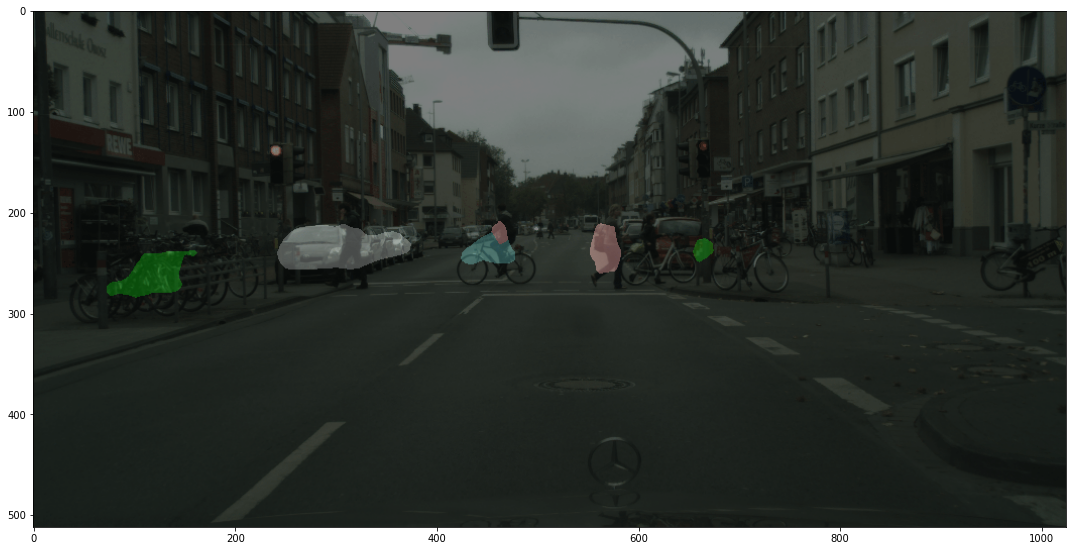

In [34]:
img='/content/mmsegmentation/demo/demo.png'
result = inference_segmentor(model, img)
show_result_pyplot(model, img, result,palette)

In [35]:
#pth dosyasını drive'a kopyalıyoruz
#!cp -v /content/mmsegmentation/work_dirs/tutorial/iter_2000.pth /content/drive/MyDrive